In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
import os
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.2)

In [3]:
model_results = {
    'Model': [
        'LogisticRegression(Diabetes)', 'LogisticRegression(Stroke)', 'LogisticRegression(Heart)', 
        'RandomForest(Diabetes)', 'RandomForest(Stroke)', 'RandomForest(Heart)',
        'XGBoost(Diabetes)', 'XGBoost(Stroke)', 'XGBoost(Heart)',
        'EnsembleHardVoting(Diabetes)', 'EnsembleHardVoting(Stroke)', 'EnsembleHardVoting(Heart)',
        'EnsembleSoftVoting(Diabetes)', 'EnsembleSoftVoting(Stroke)', 'EnsembleSoftVoting(Heart)'
    ],
    'Disease Type': [
        'Diabetes', 'Stroke', 'Heart',
        'Diabetes', 'Stroke', 'Heart',
        'Diabetes', 'Stroke', 'Heart',
        'Diabetes', 'Stroke', 'Heart',
        'Diabetes', 'Stroke', 'Heart'
    ],
    'Accuracy': [
        0.894, 0.757339, 0.831522,
        0.957850, 0.886497, 0.815217,
        0.970650, 0.893346, 0.798913,
        0.9611, 0.8806, 0.8152,
        0.9586, 0.8777, 0.8207
    ],
    'Precision': [
        0.438653, 0.143885, 0.844660,
        0.759226, 0.188679, 0.826923,
        0.92, 0.144578, 0.821782,
        0.7840, 0.1949, 0.8333,
        0.7539, 0.2, 0.8350
    ],
    'Recall': [
        0.881176, 0.8, 0.852941,
        0.738235, 0.4, 0.843137,
        0.717059, 0.24, 0.813725,
        0.7494, 0.46, 0.8333,
        0.7606, 0.5, 0.8431
    ],
    'F1': [
        0.585728, 0.243902, 0.848780,
        0.748583, 0.256410, 0.834951,
        0.805950, 0.180451, 0.817734,
        0.7663, 0.2738, 0.8333,
        0.7572, 0.2857, 0.8390
    ]
}

In [4]:
df_results = pd.DataFrame(model_results)

In [5]:
# Pivot to show models as rows, metrics as columns per disease
summary = df_results.pivot_table(
    index=['Disease Type', 'Model'],
    values=['Accuracy', 'Precision', 'Recall', 'F1']
).round(3)

display(summary)

Accuracy     F1  Precision  Recall
Disease Type Model                                                           
Diabetes     EnsembleHardVoting(Diabetes)     0.961  0.766      0.784   0.749
             EnsembleSoftVoting(Diabetes)     0.959  0.757      0.754   0.761
             LogisticRegression(Diabetes)     0.894  0.585      0.439   0.881
             RandomForest(Diabetes)           0.958  0.749      0.756   0.741
             XGBoost(Diabetes)                0.969  0.798      0.910   0.710
Heart        EnsembleHardVoting(Heart)        0.815  0.833      0.833   0.833
             EnsembleSoftVoting(Heart)        0.821  0.839      0.835   0.843
             LogisticRegression(Heart)        0.832  0.849      0.845   0.853
             RandomForest(Heart)              0.815  0.835      0.827   0.843
             XGBoost(Heart)                   0.799  0.818      0.822   0.814
Stroke       EnsembleHardVoting(Stroke)       0.881  0.274      0.195   0.460
             EnsembleSoftVoting(Stroke)       0.878  0.286      0.200   0.500
             LogisticRegression(Stroke)       0.757  0.244      0.144   0.800
             RandomForest(Stroke)             0.886  0.256      0.189   0.400
             XGBoost(Stroke)                  0.893  0.180      0.145   0.240

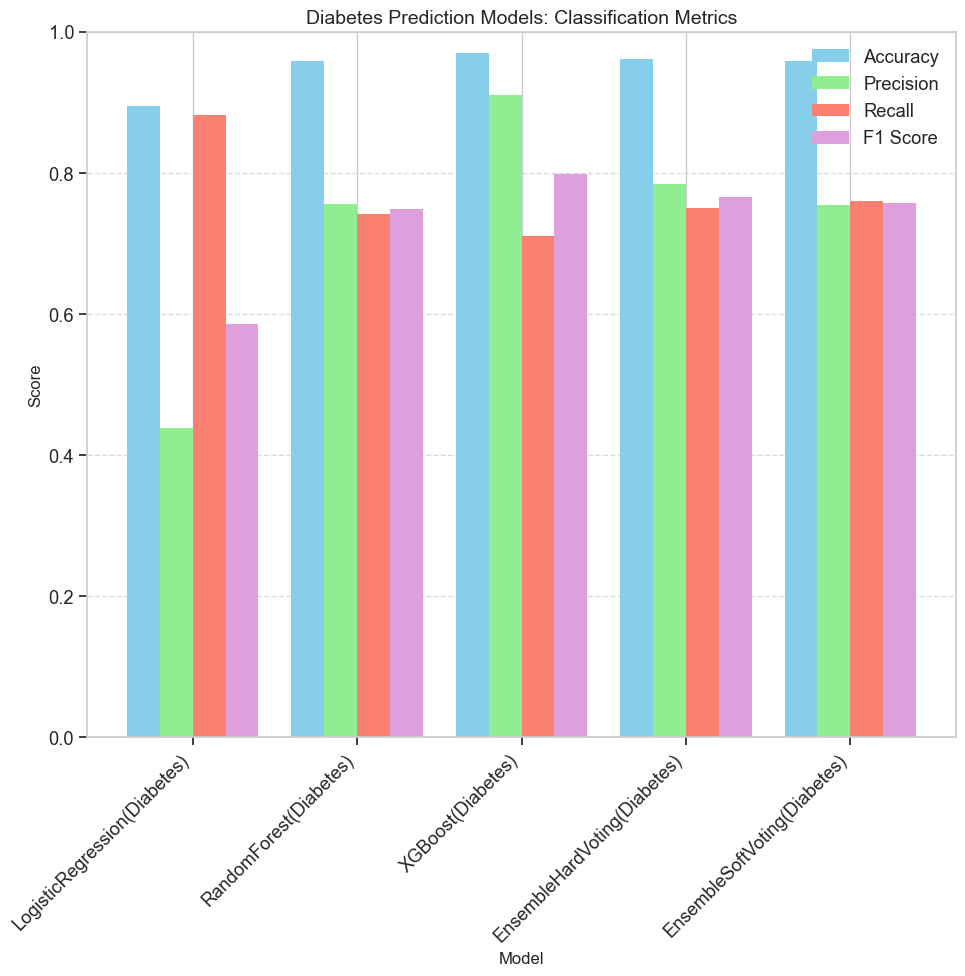

In [6]:
plt.figure(figsize=(10, 10))

# Filter for disease type
diabetes_models = df_results[df_results['Disease Type'] == 'Diabetes']
x = np.arange(len(diabetes_models))
width = 0.2

# Bar plot for each metric
plt.bar(x - 1.5*width, diabetes_models['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, diabetes_models['Precision'], width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, diabetes_models['Recall'], width, label='Recall', color='salmon')
plt.bar(x + 1.5*width, diabetes_models['F1'], width, label='F1 Score', color='plum')

plt.title('Diabetes Prediction Models: Classification Metrics', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, diabetes_models['Model'], rotation=45, ha='right')
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

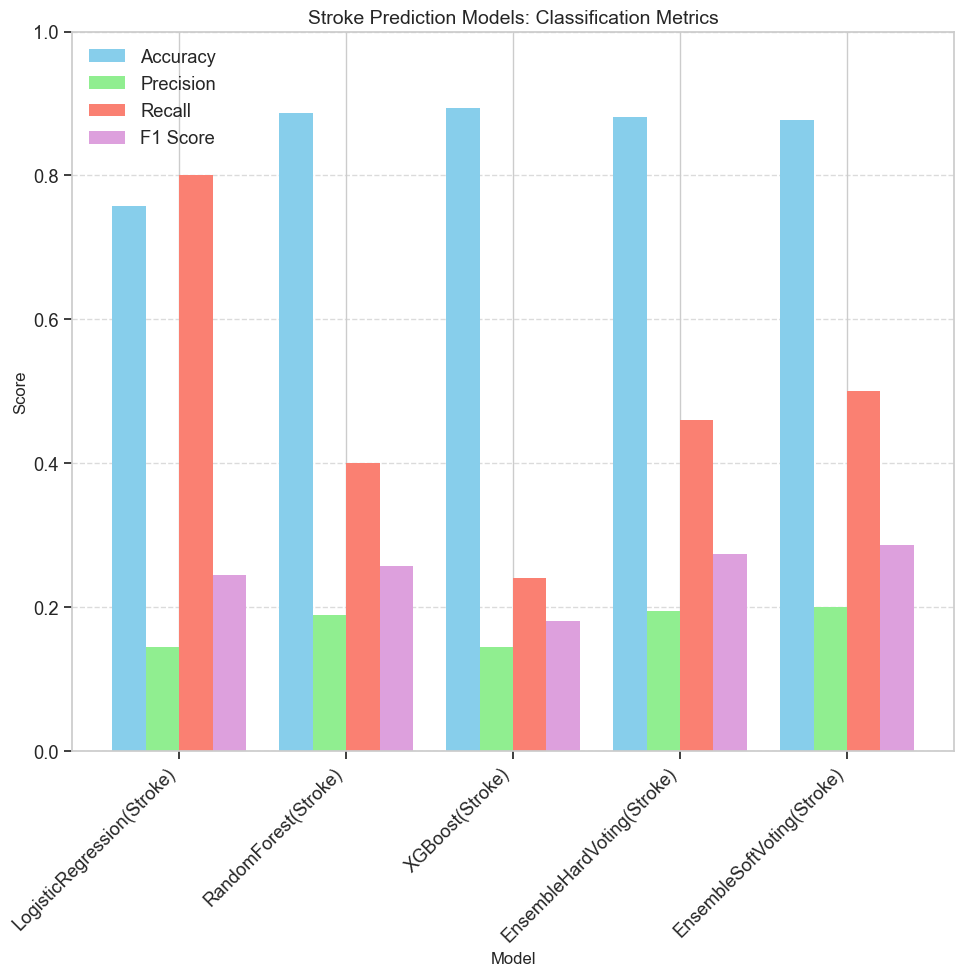

In [7]:
plt.figure(figsize=(10, 10))

stroke_models = df_results[df_results['Disease Type'] == 'Stroke']
x = np.arange(len(stroke_models))
width = 0.2

# Bar plot for each metric
plt.bar(x - 1.5*width, stroke_models['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, stroke_models['Precision'], width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, stroke_models['Recall'], width, label='Recall', color='salmon')
plt.bar(x + 1.5*width, stroke_models['F1'], width, label='F1 Score', color='plum')

plt.title('Stroke Prediction Models: Classification Metrics', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, stroke_models['Model'], rotation=45, ha='right')
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

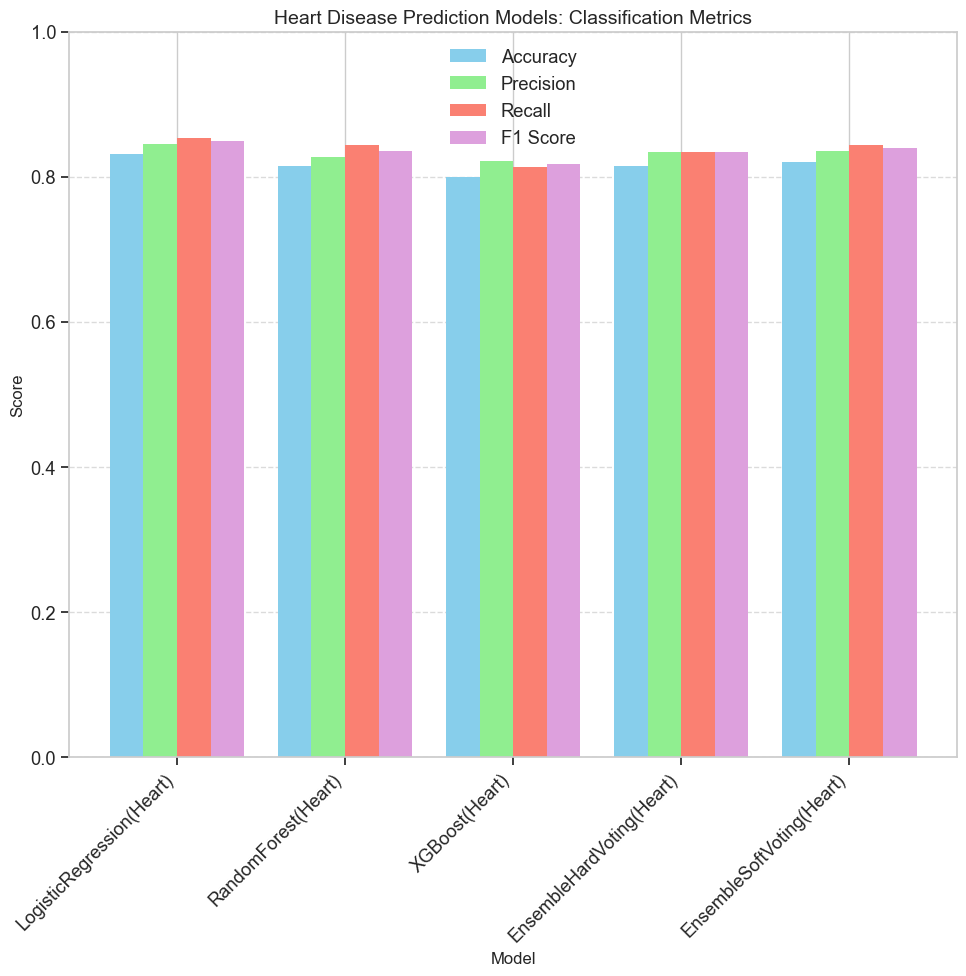

In [8]:
plt.figure(figsize=(10, 10))

heart_models = df_results[df_results['Disease Type'] == 'Heart']
x = np.arange(len(heart_models))
width = 0.2

# Bar plot for each metric
plt.bar(x - 1.5*width, heart_models['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, heart_models['Precision'], width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, heart_models['Recall'], width, label='Recall', color='salmon')
plt.bar(x + 1.5*width, heart_models['F1'], width, label='F1 Score', color='plum')

plt.title('Heart Disease Prediction Models: Classification Metrics', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(x, heart_models['Model'], rotation=45, ha='right')
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

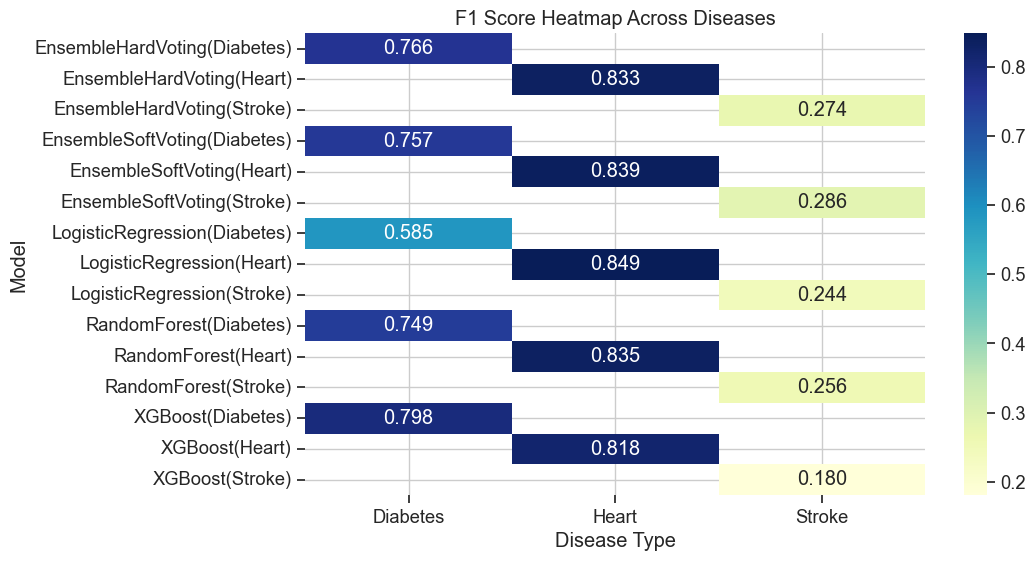

In [9]:
pivot = df_results.pivot(index='Model', columns='Disease Type', values='F1')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('F1 Score Heatmap Across Diseases')
plt.ylabel('Model')
plt.show()

In [10]:
df_results_rounded = df_results.copy()
df_results_rounded[['Accuracy', 'Precision', 'Recall', 'F1']] = df_results_rounded[['Accuracy', 'Precision', 'Recall', 'F1']].round(3)

# Display grouped by disease
for disease in df_results_rounded['Disease Type'].unique():
    display(df_results_rounded[df_results_rounded['Disease Type'] == disease].sort_values(by='F1', ascending=False))


,Model,Disease Type,Accuracy,Precision,Recall,F1
6,XGBoost(Diabetes),Diabetes,0.969,0.910,0.710,0.798
9,EnsembleHardVoting(Diabetes),Diabetes,0.961,0.784,0.749,0.766
12,EnsembleSoftVoting(Diabetes),Diabetes,0.959,0.754,0.761,0.757
3,RandomForest(Diabetes),Diabetes,0.958,0.756,0.741,0.749
0,LogisticRegression(Diabetes),Diabetes,0.894,0.439,0.881,0.585


,Model,Disease Type,Accuracy,Precision,Recall,F1
13,EnsembleSoftVoting(Stroke),Stroke,0.878,0.200,0.50,0.286
10,EnsembleHardVoting(Stroke),Stroke,0.881,0.195,0.46,0.274
4,RandomForest(Stroke),Stroke,0.886,0.189,0.40,0.256
1,LogisticRegression(Stroke),Stroke,0.757,0.144,0.80,0.244
7,XGBoost(Stroke),Stroke,0.893,0.145,0.24,0.180


,Model,Disease Type,Accuracy,Precision,Recall,F1
2,LogisticRegression(Heart),Heart,0.832,0.845,0.853,0.849
14,EnsembleSoftVoting(Heart),Heart,0.821,0.835,0.843,0.839
5,RandomForest(Heart),Heart,0.815,0.827,0.843,0.835
11,EnsembleHardVoting(Heart),Heart,0.815,0.833,0.833,0.833
8,XGBoost(Heart),Heart,0.799,0.822,0.814,0.818


In [11]:
best_models = df_results.loc[df_results.groupby('Disease Type')['F1'].idxmax()]
display(best_models[['Disease Type', 'Model', 'F1']])


,Disease Type,Model,F1
6,Diabetes,XGBoost(Diabetes),0.797753
2,Heart,LogisticRegression(Heart),0.848780
13,Stroke,EnsembleSoftVoting(Stroke),0.285700
